In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

import matplotlib.pylab as pylab

params = {'axes.titlesize': 10,
          'font.size': 12}
pylab.rcParams.update(params)

In [2]:
def best_h(df):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x['SHD_pattern'].idxmin()])

def worst_h(df):
    return df.groupby(['id'], as_index=False).apply(lambda x: x.loc[x['SHD_pattern'].idxmax()])

## Tables

In [13]:
df_all = pd.read_csv('./results/sachs/joint_benchmarks.csv', index_col=0)
df_all['id'] = df_all.apply(lambda x: x['id'].upper(), axis=1)

df_best = best_h(df_all)
df_best['SHD'] = df_best['SHD_pattern']

df_worst = worst_h(df_all)
df_worst['SHD'] = df_worst['SHD_pattern']

In [4]:
df_best[['id', 'SHD']]

,id,SHD
0,ANM,15
1,CAM,9
2,FCI,9
3,FGES,9
4,LINGAM,9
5,NOTEARS,8
6,NOTEARS_MLP,8
7,PC,9


In [14]:
df_merged = df_best.merge(df_worst, on='id', suffixes=['_best', '_worst'])

display(df_merged[['id', 'SHD_best', 'SHD_worst']])

,id,SHD_best,SHD_worst
0,ANM,15,25
1,CAM,9,32
2,FCI,9,21
3,FGES,9,15
4,LINGAM,9,12
5,NOTEARS,8,39
6,NOTEARS_MLP,8,33
7,PC,9,22


In [15]:
defs = []

# from ./results/defaults/
defs.append(df_all.loc[(df_all['id'] == 'ANM') & (df_all['alpha'] == 0.001)])
defs.append(df_all.loc[(df_all['id'] == 'CAM') & (df_all['cutoff'] == 0.001)])
defs.append(df_all.loc[(df_all['id'] == 'FCI') & (df_all['alpha'] == 0.001)])
defs.append(df_all.loc[(df_all['id'] == 'FGES') & (df_all['penaltyDiscount'] == 1.5)])
defs.append(df_all.loc[(df_all['id'] == 'LINGAM') & (df_all['thresh'] == 0.5) & (df_all['max_iter'] == 100)])
defs.append(df_all.loc[(df_all['id'] == 'NOTEARS_MLP') & (df_all['lambda1'] == 0.01) & (df_all['lambda2'] == 0.1) & (df_all['w_threshold'] == 0.5) & (df_all['hidden_units'] == 16)])
defs.append(df_all.loc[(df_all['id'] == 'NOTEARS') & (df_all['lambda1'] == 0.2) & (df_all['w_threshold'] == 0.2) & (df_all['max_iter'] == 100)])
defs.append(df_all.loc[(df_all['id'] == 'PC') & (df_all['alpha'] == 0.002)])

df_hard_defs = pd.concat(defs, axis=0)

df_hard_defs['SHD'] = df_hard_defs['SHD_pattern']

In [16]:
df_paper_defs = pd.read_csv('./results/sachs_defaults/joint_benchmarks.csv', index_col=0)
df_paper_defs['SHD'] = df_paper_defs['SHD_pattern']
df_paper_defs['id'] = df_paper_defs.apply(lambda x: x['id'].upper(), axis=1)

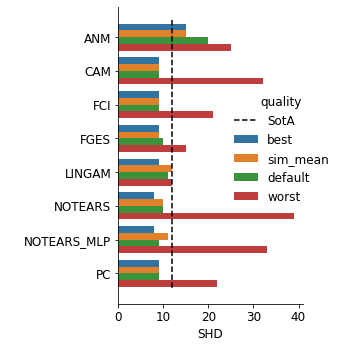

In [22]:
df_best['quality'] = 'best'
df_hard_defs['quality'] = 'sim_mean'
df_paper_defs['quality'] = 'default'
df_worst['quality'] = 'worst'
df_qual = pd.concat([df_best, df_hard_defs, df_paper_defs, df_worst], axis=0)

sns.catplot(data=df_qual, x='SHD', y='id', hue='quality', kind='bar', orient='h', legend=None).set(ylabel=' ')
plt.vlines(12, ymin=-0.5, ymax=7.5, linestyles='dashed', label='SotA', colors='k')
plt.legend(loc='center right', frameon=False, title='quality', bbox_to_anchor=(1.2, 0.52))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_quality_hard.pdf', dpi=1000)

## Distributions

In [3]:
df = pd.read_csv('./results/sachs/joint_benchmarks.csv', index_col=0)
df['id'] = df.apply(lambda x: x['id'].upper(), axis=1)
algs = df['id'].unique()
algs.sort()

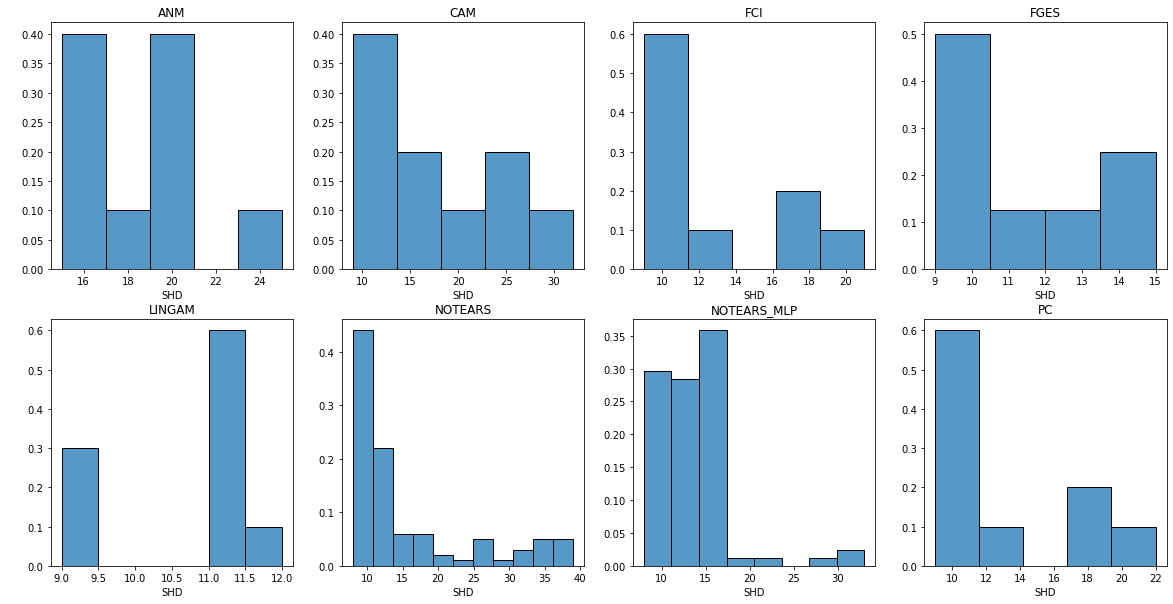

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for ax, alg in zip(axes, algs):
    ax.set_title(alg)
    ax.set_xlabel('SHD')
    ax.set_ylabel(' ')
    sns.histplot(df.loc[df['id'] == alg, 'SHD_pattern'], ax=ax, stat='probability')

<AxesSubplot:xlabel='SHD_pattern', ylabel='id'>

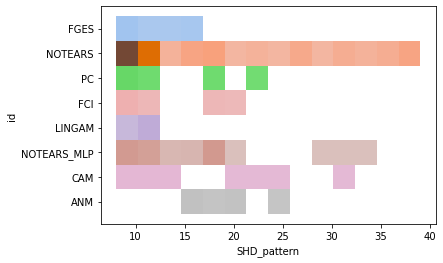

In [22]:
sns.histplot(df, x='SHD_pattern', y='id', hue='id', legend=False)

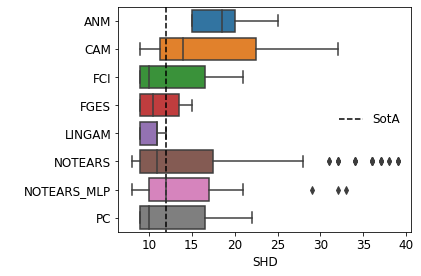

In [4]:
sns.boxplot(data=df, x='SHD_pattern', y='id', order=algs).set(xlabel='SHD', ylabel=' ')

plt.vlines(12, ymin=-0.5, ymax=7.5, linestyles='dashed', label='SotA', colors='k')
plt.legend(loc='center right', frameon=False)

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_h_box.pdf', dpi=1000)

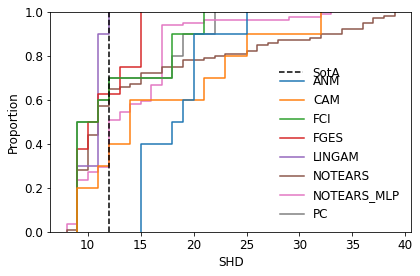

In [12]:
fig, ax = plt.subplots()

g = sns.ecdfplot(data=df, x='SHD_pattern', hue='id', hue_order=algs, legend=True, ax=ax)
g.set(xlabel='SHD')
    
sota = plt.vlines(12, ymin=0, ymax=1, linestyles='dashed', label='SotA', colors='k')

ax.get_legend().set_title('')
ax.get_legend().get_frame().set_alpha(0)

fig.legend(loc='lower center', frameon=False, handles=[sota], bbox_to_anchor=(0.73, 0.665))

plt.tight_layout()
plt.savefig('./plots/sachs/sachs_h_ecdf.pdf', dpi=1000)